# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
test_url = f'http://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}&units=imperial'

response = requests.get(test_url).json()
pprint(response)
#pprint(response)
#response['name'] <-city name
#response['coord']['lat'] <-latitude
#response['coord']['lon'] <-longitude
#response['main']['temp_max'] <-max temp
#response['main']['humidity'] <-humidity
#response['clouds']['all'] <-cloudiness
#response['wind']['speed'] <-wind speed
#response['sys']['country'] <-country
#response['dt']<-date

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1645381136,
 'id': 4030556,
 'main': {'feels_like': 77.77,
          'grnd_level': 1013,
          'humidity': 78,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 76.73,
          'temp_max': 76.73,
          'temp_min': 76.73},
 'name': 'Rikitea',
 'rain': {'1h': 0.41},
 'sys': {'country': 'PF', 'sunrise': 1645368682, 'sunset': 1645414568},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 154, 'gust': 11.05, 'speed': 10.29}}


In [5]:
call_count = 0
city_count = 1
names = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []

for city in cities:
    base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response = requests.get(base_url).json()

    try:
        names.append(response['name'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
    except:
        names.append('N/A')
        lats.append('N/A')
        lons.append('N/A')
        max_temps.append('N/A')
        humidities.append('N/A')
        clouds.append('N/A')
        wind_speeds.append('N/A')
        countries.append('N/A')
        dates.append('N/A')

    print(f'City #{city_count}: {city}')

    call_count+=1
    city_count+=1

    if call_count > 49:
        time.sleep(60)
        call_count = 0
    

City #1: rikitea
City #2: chuy
City #3: hermanus
City #4: saldanha
City #5: traiguen
City #6: port alfred
City #7: awbari
City #8: roma
City #9: taolanaro
City #10: meulaboh
City #11: quimper
City #12: finnsnes
City #13: katsuura
City #14: atuona
City #15: ifo
City #16: mataura
City #17: tezu
City #18: lumeje
City #19: tubuala
City #20: busselton
City #21: bloomingdale
City #22: smithers
City #23: verkhnyaya inta
City #24: atasu
City #25: arco
City #26: ushuaia
City #27: halalo
City #28: punta arenas
City #29: albany
City #30: cape town
City #31: vila velha
City #32: tuktoyaktuk
City #33: khatanga
City #34: belushya guba
City #35: lebu
City #36: tiznit
City #37: lagoa
City #38: avarua
City #39: thompson
City #40: bredasdorp
City #41: hervey bay
City #42: barrow
City #43: saint-jean-de-la-ruelle
City #44: marcona
City #45: ponta do sol
City #46: thibodaux
City #47: tasiilaq
City #48: santa quiteria
City #49: bluff
City #50: raymond
City #51: bengkulu
City #52: manono
City #53: vaitupu
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
    'City':names,
    'Lat':lats,
    'Lng':lons,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':clouds,
    'Wind Speed':wind_speeds,
    'Country':countries,
    'Date':dates
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.969,76.73,78,30,10.29,PF,1645381136
1,Chui,-33.6971,-53.4616,82.02,58,77,14.67,UY,1645381197
2,Hermanus,-34.4187,19.2345,65.8,85,0,9.01,ZA,1645381091
3,Saldanha,-33.0117,17.9442,63.86,88,9,9.51,ZA,1645381198
4,Traiguén,-38.25,-72.6833,73.09,30,23,7.7,CL,1645381198
...,...,...,...,...,...,...,...,...,...
638,Radovitskiy,55.1282,39.7956,27.36,92,53,8.72,RU,1645383207
639,Boden,65.8252,21.6886,14,98,100,3.76,SE,1645383207
640,Maryville,35.7565,-83.9705,60.15,31,5,5.99,US,1645383207
641,Buin,-33.7333,-70.75,84.06,19,100,10.25,CL,1645383208


In [7]:
bad_data = weather_df['City']=='N/A'
bad_index = weather_df.loc[bad_data].index
cleaned_df = weather_df.drop(bad_index)

#len(weather_df.loc[bad_data]['City'])

In [42]:
cleaned_df.to_csv('weather_output/weather.csv')

cleaned_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.969,76.73,78,30,10.29,PF,1645381136
1,Chui,-33.6971,-53.4616,82.02,58,77,14.67,UY,1645381197
2,Hermanus,-34.4187,19.2345,65.8,85,0,9.01,ZA,1645381091
3,Saldanha,-33.0117,17.9442,63.86,88,9,9.51,ZA,1645381198
4,Traiguén,-38.25,-72.6833,73.09,30,23,7.7,CL,1645381198
...,...,...,...,...,...,...,...,...,...
638,Radovitskiy,55.1282,39.7956,27.36,92,53,8.72,RU,1645383207
639,Boden,65.8252,21.6886,14,98,100,3.76,SE,1645383207
640,Maryville,35.7565,-83.9705,60.15,31,5,5.99,US,1645383207
641,Buin,-33.7333,-70.75,84.06,19,100,10.25,CL,1645383208


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cleaned_df.loc[cleaned_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

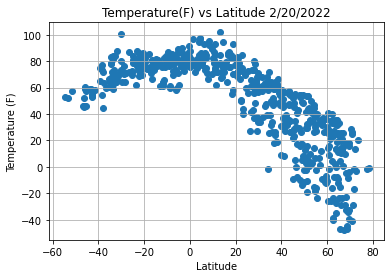

In [79]:
x_axis = cleaned_df['Lat']
y_axis = cleaned_df['Max Temp']

plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature(F) vs Latitude 2/20/2022')
plt.grid()
plt.savefig('weather_output/temp_lat.png')

## Latitude vs. Humidity Plot

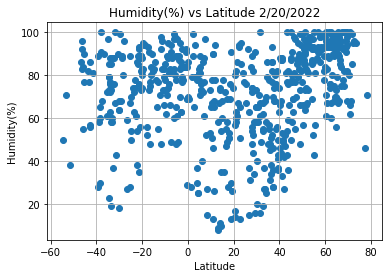

In [78]:
x_axis = cleaned_df['Lat']
y_axis = cleaned_df['Humidity']

plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity(%) vs Latitude 2/20/2022')
plt.grid()
plt.savefig('weather_output/Humidity_lat.png')

## Latitude vs. Cloudiness Plot

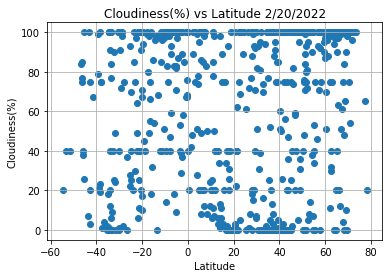

In [80]:
x_axis = cleaned_df['Lat']
y_axis = cleaned_df['Cloudiness']

plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness(%) vs Latitude 2/20/2022')
plt.grid()
plt.savefig('weather_output/cloudiness_lat.png')

## Latitude vs. Wind Speed Plot

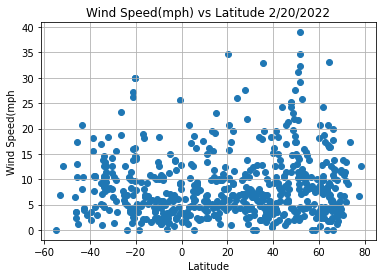

In [81]:
x_axis = cleaned_df['Lat']
y_axis = cleaned_df['Wind Speed']

plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph')
plt.title('Wind Speed(mph) vs Latitude 2/20/2022')
plt.grid()
plt.savefig('weather_output/wind_speed_lat.png')


## Linear Regression

In [91]:
north_df = cleaned_df.loc[cleaned_df['Lat'] >= 0]
south_df = cleaned_df.loc[cleaned_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6956990754674807


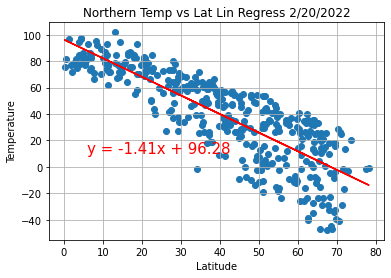

In [92]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Temp vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/north_temp_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3604795278142137


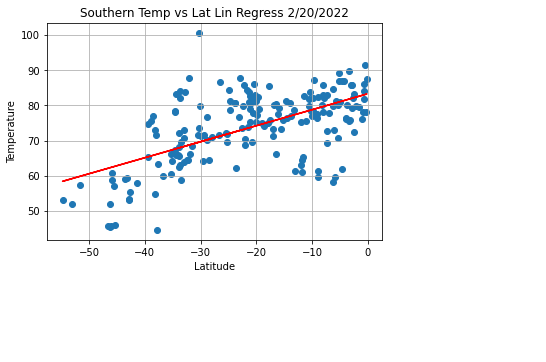

In [93]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Temp vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/south_temp_lat.png')
plt.show()


In [94]:
# TEMPERATURE VS LATITUDE
# In the above plots we can see that in the norther hemisphere, the temperature decreases as latitude increases.
# The inverse is true in the southern hemisphere. This seems to imply that temperatures are highest when the latitude
# is zero, or at latitudes along Earth's equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20891535981244125


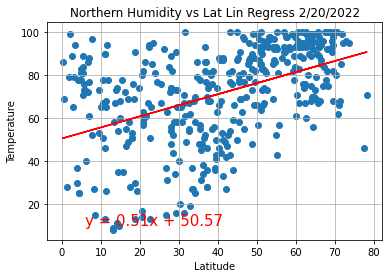

In [95]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Humidity vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/north_humidity_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.032042113331807676


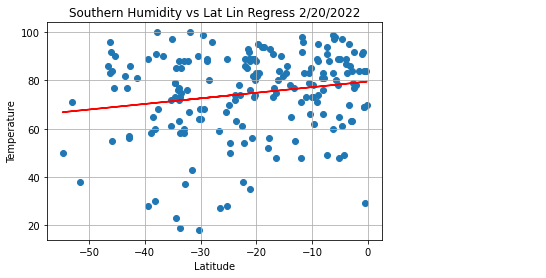

In [96]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Humidity vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/south_humidity_lat.png')
plt.show()

In [97]:
#HUMIDITY VS LATITUDE
#The above plots show that humidity seems to increase as latitude increases in both the northern and southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08817268336780469


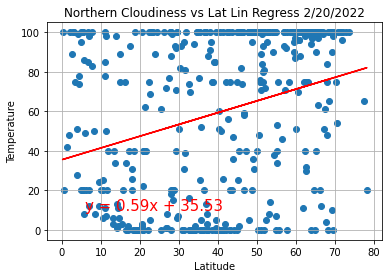

In [98]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Cloudiness vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/north_cloudiness_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11541381442683174


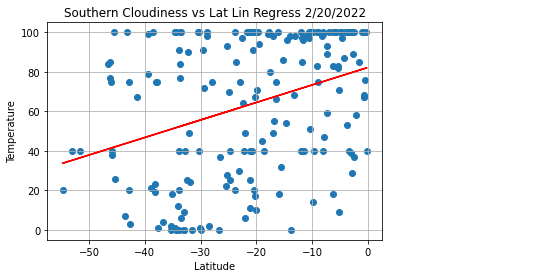

In [99]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Cloudiness vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/south_cloudiness_lat.png')
plt.show()

In [100]:
#CLOUDINESS VS LATITUDE
#The above plots show that as latitudes increase, cloudiness increases as well even.
#This, in addition to the previous plots seems to imply that further north you go, the higher the average cloudiness and humidity
#It seems like these two plots could indicate a connection with precipitation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004856921973841342


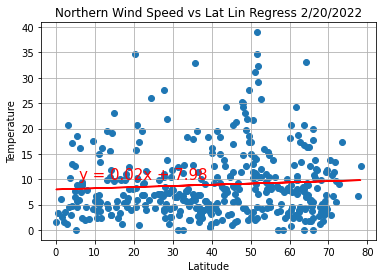

In [101]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Wind Speed vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/north_wind_speed_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018279562942901523


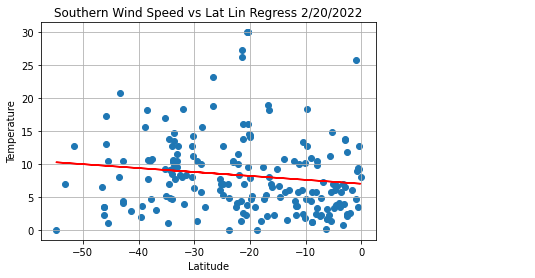

In [102]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Wind Speed vs Lat Lin Regress 2/20/2022')
plt.grid()
plt.savefig('weather_output/south_wind_speed_lat.png')
plt.show()

In [103]:
#WIND SPEED VS LATITUDE
#The above plots show that as the latitude approaches zero, the average winds speeds decrease.